In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
vet = pd.read_csv('veteran.csv')

In [3]:
vet.head()

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0,14974,NaN,2,4,1,3,17.0,13.50,9.25,...,13,A,0,0,NaN,F,U,0,0,0
1,0,6294,NaN,1,8,0,3,20.0,20.00,15.88,...,24,A,0,23,67.0,F,U,186800,85,0
2,1,46110,4.0,6,41,3,20,6.0,5.17,3.73,...,22,S,1,0,NaN,M,U,87600,36,38750
3,1,185937,10.0,3,12,3,8,10.0,8.67,8.50,...,16,E,1,0,NaN,M,U,139200,27,38942
4,0,29637,NaN,1,1,1,1,20.0,20.00,20.00,...,6,F,0,35,53.0,M,U,168100,37,71509


In [24]:
def data_prep():
    # read the veteran dataset
    df = pd.read_csv('veteran.csv')
    
    # change DemCluster from interval/integer to nominal/str
    df['DemCluster'] = df['DemCluster'].astype(str)
    
    # change DemHomeOwner into binary 0/1 variable
    dem_home_owner_map = {'U':0, 'H': 1}
    df['DemHomeOwner'] = df['DemHomeOwner'].map(dem_home_owner_map)
    
    # denote errorneous values in DemMidIncome
    mask = df['DemMedIncome'] < 1
    df.loc[mask, 'DemMedIncome'] = np.nan
    
    # impute missing values in DemAge with its mean
    df['DemAge'] = df['DemAge'].fillna(df['DemAge'].mean())

    # impute med income using mean
    df.loc[:,'DemMedIncome'] = df['DemMedIncome'].fillna(df['DemMedIncome'].mean())

    # impute gift avg card 36 using mean
    df.loc[:,'GiftAvgCard36'] = df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].mean())
    
    # drop ID and the unused target variable
    df.drop(['ID', 'TargetD'], axis=1, inplace=True)
    
    # one-hot encoding
    df = pd.get_dummies(df)
    
    y = df['TargetB']
    X = df.drop(['TargetB'], axis=1)

    # setting random state
    rs = 10

    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

    return df,X,y,X_train, X_test, y_train, y_test

In [25]:
df,X,y,X_train, X_test, y_train, y_test = data_prep()

In [26]:
df

,TargetB,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,...,DemCluster_51,DemCluster_52,DemCluster_53,DemCluster_6,DemCluster_7,DemCluster_8,DemCluster_9,DemGender_F,DemGender_M,DemGender_U
0,0,2,4,1,3,17.0,13.50,9.25,17.000000,21,...,False,False,False,False,False,False,False,True,False,False
1,0,1,8,0,3,20.0,20.00,15.88,14.224431,26,...,False,False,False,False,False,False,False,True,False,False
2,1,6,41,3,20,6.0,5.17,3.73,5.000000,18,...,False,False,False,False,False,False,False,False,True,False
3,1,3,12,3,8,10.0,8.67,8.50,8.670000,9,...,False,False,False,False,False,False,False,False,True,False
4,0,1,1,1,1,20.0,20.00,20.00,20.000000,21,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,1,2,2,2,2,10.0,15.00,15.00,15.000000,17,...,False,False,False,False,False,False,False,False,True,False
9682,0,3,4,1,1,10.0,13.33,11.50,10.000000,25,...,False,False,False,False,False,False,False,False,False,True
9683,1,9,14,5,7,10.0,8.78,7.71,8.800000,15,...,False,False,False,False,False,False,False,True,False,False
9684,0,2,7,0,1,5.0,12.50,7.43,14.224431,6,...,False,False,False,False,False,False,False,False,True,False


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [28]:
rs = 10

In [29]:
# Decision Tree
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [31]:
model.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 10,
 'splitter': 'best'}

In [32]:
print(f'Training accuracy: {accuracy_score(y_train, model.predict(X_train))}')

Training accuracy: 1.0


In [33]:
print(f'Test accuracy: {accuracy_score(y_test, model.predict(X_test))}')

Test accuracy: 0.5216792842395045


In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1453
           1       0.52      0.54      0.53      1453

    accuracy                           0.52      2906
   macro avg       0.52      0.52      0.52      2906
weighted avg       0.52      0.52      0.52      2906



In [2]:
importances = model.feature_importances_
feature_names = X.columns

NameError: name 'model' is not defined

In [1]:
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

indices = indices[:10]

for i in indices:
    print(f'{feature_names[i]}: {importances[i]}')

NameError: name 'np' is not defined

In [40]:
model_small = DecisionTreeClassifier(max_depth=3, random_state=rs)
model_small.fit(X_train, y_train)

print(f'Training accuracy: {accuracy_score(y_train, model_small.predict(X_train))}')
print(f'Test accuracy: {accuracy_score(y_test, model_small.predict(X_test))}')

print(classification_report(y_test, model_small.predict(X_test)))

Training accuracy: 0.5724188790560472
Test accuracy: 0.5467997247075017
              precision    recall  f1-score   support

           0       0.56      0.42      0.48      1453
           1       0.54      0.67      0.60      1453

    accuracy                           0.55      2906
   macro avg       0.55      0.55      0.54      2906
weighted avg       0.55      0.55      0.54      2906



In [41]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

In [44]:
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
if isinstance(graph, list):
    graph[0].write_png("dt_viz.png")  # If it's a list, use indexing
else:
    graph.write_png("dt_viz.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.515764 to fit



In [45]:
importances = model_small.feature_importances_
feature_names = X.columns

In [46]:
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

In [47]:
indices = indices[:20]

In [48]:
for i in indices:
    print(f'{feature_names[i]}: {importances[i]}')

GiftCnt36: 0.4735894757566948
GiftAvgLast: 0.2162443601186481
GiftTimeLast: 0.11378854045338041
DemMedHomeValue: 0.10584693229397368
GiftCntAll: 0.07136807839806607
DemCluster_8: 0.019162612979236944
DemCluster_11: 0.0
StatusCat96NK_F: 0.0
StatusCat96NK_L: 0.0
StatusCat96NK_N: 0.0
StatusCat96NK_S: 0.0
DemCluster_0: 0.0
DemCluster_1: 0.0
DemCluster_10: 0.0
DemCluster_12: 0.0
StatusCat96NK_A: 0.0
DemCluster_13: 0.0
DemCluster_14: 0.0
DemCluster_15: 0.0
DemCluster_16: 0.0


In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

In [58]:
cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
result_set

{'mean_fit_time': array([0.0244081 , 0.0216392 , 0.02175305, 0.02025814, 0.02485127,
        0.02600002, 0.02587526, 0.02522428, 0.02960105, 0.03130965,
        0.02985511, 0.03015425, 0.03465402, 0.03465791, 0.03542452,
        0.0351073 , 0.04092035, 0.03960292, 0.03957944, 0.03936059,
        0.04535224, 0.04461119, 0.04411726, 0.04370894, 0.04884634,
        0.0484    , 0.04812934, 0.04747005, 0.05374277, 0.05249245,
        0.05433917, 0.05127521, 0.05811763, 0.05678029, 0.05597899,
        0.05465586, 0.0624033 , 0.0608094 , 0.05900095, 0.05741236,
        0.0656698 , 0.06326666, 0.06175969, 0.06003773, 0.06928215,
        0.06688778, 0.06470742, 0.06158447, 0.07383657, 0.06941621,
        0.06569874, 0.06401806, 0.07578113, 0.07146397, 0.06730745,
        0.06433215, 0.07824998, 0.07298696, 0.06856   , 0.06490207,
        0.0201792 , 0.02023549, 0.02030642, 0.02065089, 0.02553113,
        0.02547095, 0.02538254, 0.02501903, 0.03059473, 0.03096926,
        0.0310627 , 0.03079996,

In [59]:
import matplotlib.pyplot as plt


train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  120


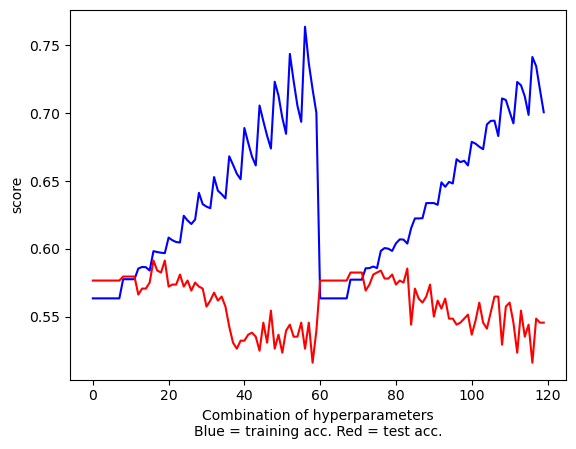

In [61]:
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

In [3]:
cv_1.best_params_

NameError: name 'cv_1' is not defined